## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('APPLE_TRAINING_DATA.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
training_set.shape

(3144, 1)

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 120 timesteps and 1 output

In [5]:
X_train = []
y_train = []
for i in range(120, 3144):
    X_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [8]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fifth LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

### Adding the output layer

In [14]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [16]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
95/95 [==============================] - 49s 432ms/step - loss: 0.0074
Epoch 2/100
95/95 [==============================] - 42s 446ms/step - loss: 0.0017
Epoch 3/100
95/95 [==============================] - 44s 463ms/step - loss: 0.0015
Epoch 4/100
95/95 [==============================] - 45s 479ms/step - loss: 0.0014
Epoch 5/100
95/95 [==============================] - 48s 510ms/step - loss: 0.0018
Epoch 6/100
95/95 [==============================] - 45s 473ms/step - loss: 0.0013
Epoch 7/100
95/95 [==============================] - 45s 478ms/step - loss: 0.0015
Epoch 8/100
95/95 [==============================] - 46s 483ms/step - loss: 0.0011
Epoch 9/100
95/95 [==============================] - 46s 482ms/step - loss: 0.0011
Epoch 10/100
95/95 [==============================] - 48s 509ms/step - loss: 9.7087e-04
Epoch 11/100
95/95 [==============================] - 44s 467ms/step - loss: 0.0012
Epoch 12/100
95/95 [==============================] - 45s 473ms/step - loss: 9.64

95/95 [==============================] - 45s 472ms/step - loss: 4.6745e-04
Epoch 95/100
95/95 [==============================] - 45s 476ms/step - loss: 5.0142e-04
Epoch 96/100
95/95 [==============================] - 46s 486ms/step - loss: 4.1137e-04
Epoch 97/100
95/95 [==============================] - 45s 472ms/step - loss: 4.7592e-04
Epoch 98/100
95/95 [==============================] - 44s 462ms/step - loss: 4.3344e-04
Epoch 99/100
95/95 [==============================] - 44s 460ms/step - loss: 4.5680e-04
Epoch 100/100
95/95 [==============================] - 44s 466ms/step - loss: 5.4553e-04


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [17]:
dataset_test = pd.read_csv('APPLE_TESTING_DATA.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 140):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

## Prediction

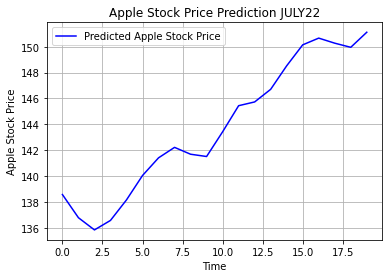

In [19]:
# plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction JULY22')
plt.xlabel('Time')
plt.grid()
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

## Training 

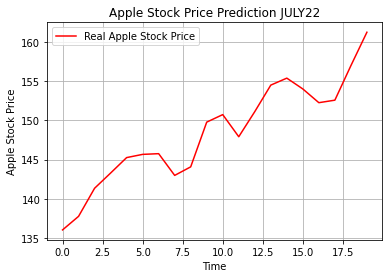

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
# plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction JULY22')
plt.xlabel('Time')
plt.grid()
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

## Combined Predicted and Actual Trend

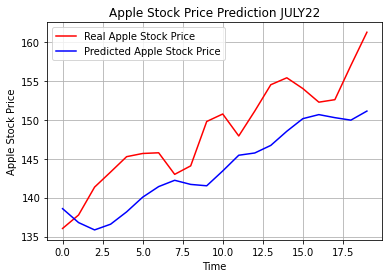

In [21]:
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction JULY22')
plt.xlabel('Time')
plt.grid()
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

### However for our specific Stock Price Prediction problem, evaluating the model with the RMSE does not make much sense, since we are more interested in the directions taken by our predictions, rather than the closeness of their values to the real stock price. We want to check if our predictions follow the same directions as the real stock price and we don’t really care whether our predictions are close the real stock price. The predictions could indeed be close but often taking the opposite direction from the real stock price.

In [22]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [23]:
rmse

5.607462426108811

## Observations

### To be very honest it is exactly impossible to predict the future stock prices otherwise we would all become billonaries but it is possible to predict the patterns that we have predicted. we have predicted the upward and downward trends that exist in the Apple stock price

### Our model reacts very okay to the smooth changes for example we are getting an information that the apple stock price will definitely increase in between 2.5th and 7th day and as you can see it is increasing so we can sell our shares at that particular spike which can be very profitable and we getting the same smooth changes at few more location as you can see the prediction

### We have big spike like a stock time singularity and our predictions did not follow that but that is completely normal our model just lags behind because it cannot react fast to non-linear changes and according to the Brownian motion mathematical concept in financial engineering the future variations of the stock price are independent from the past 

In [29]:
import pickle

In [31]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

INFO:tensorflow:Assets written to: ram://8178f072-460f-4508-93d0-30f3a840f3d7/assets


INFO:tensorflow:Assets written to: ram://8178f072-460f-4508-93d0-30f3a840f3d7/assets
